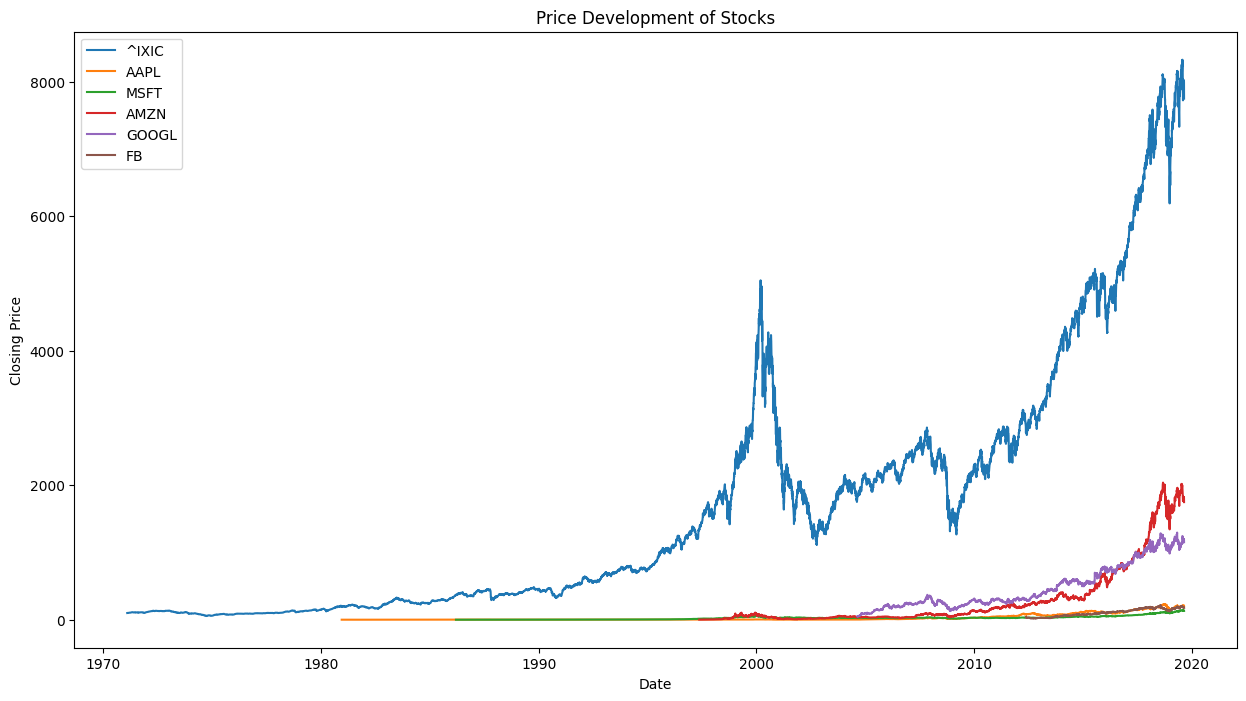

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/big_five_stocks.csv")

df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the closing price development for each stock
plt.figure(figsize=(15, 8))

for stock in df['name'].unique():
    stock_data = df[df['name'] == stock]
    plt.plot(stock_data['Date'], stock_data['close'], label=stock)

plt.title('Price Development of Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

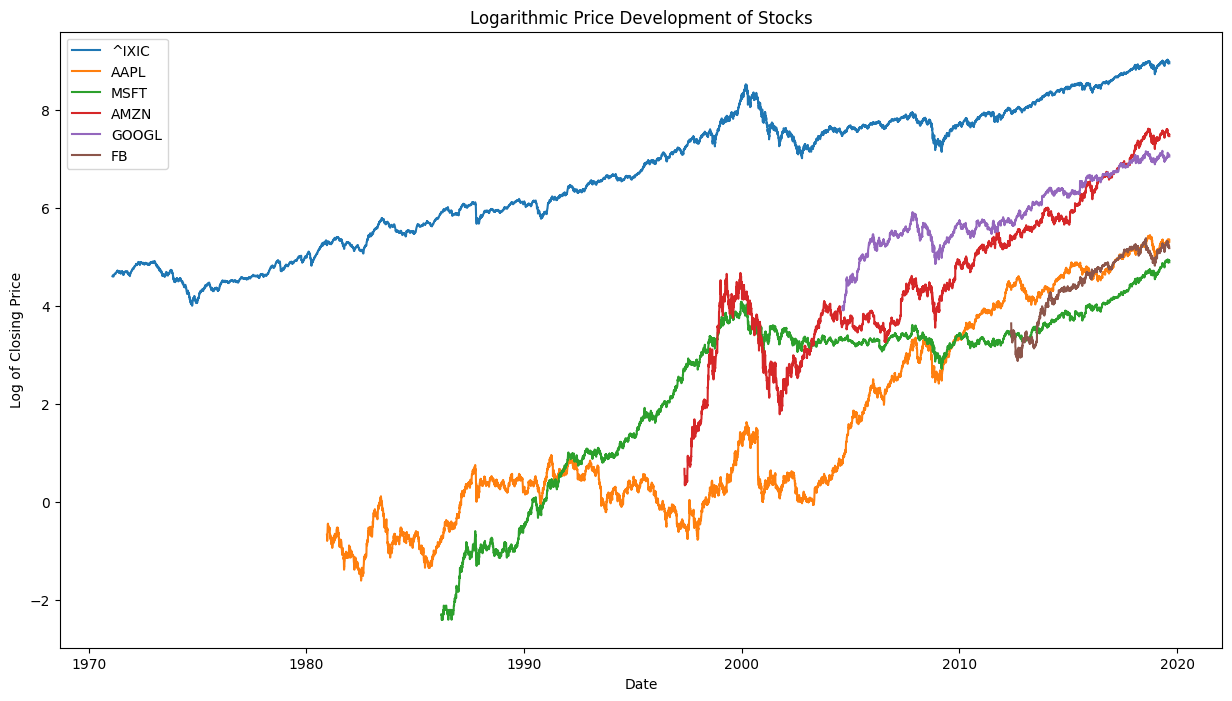

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/big_five_stocks.csv")

df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the logarithmic closing price development for each stock
plt.figure(figsize=(15, 8))

for stock in df['name'].unique():
    stock_data = df[df['name'] == stock]
    plt.plot(stock_data['Date'], np.log(stock_data['close']), label=stock)

plt.title('Logarithmic Price Development of Stocks')
plt.xlabel('Date')
plt.ylabel('Log of Closing Price')
plt.legend()
plt.show()


<ipython-input-16-0544191364b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['percentage_change'] = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100
<ipython-input-16-0544191364b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['percentage_change'] = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100
<ipython-input-16-0544191364b9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy o

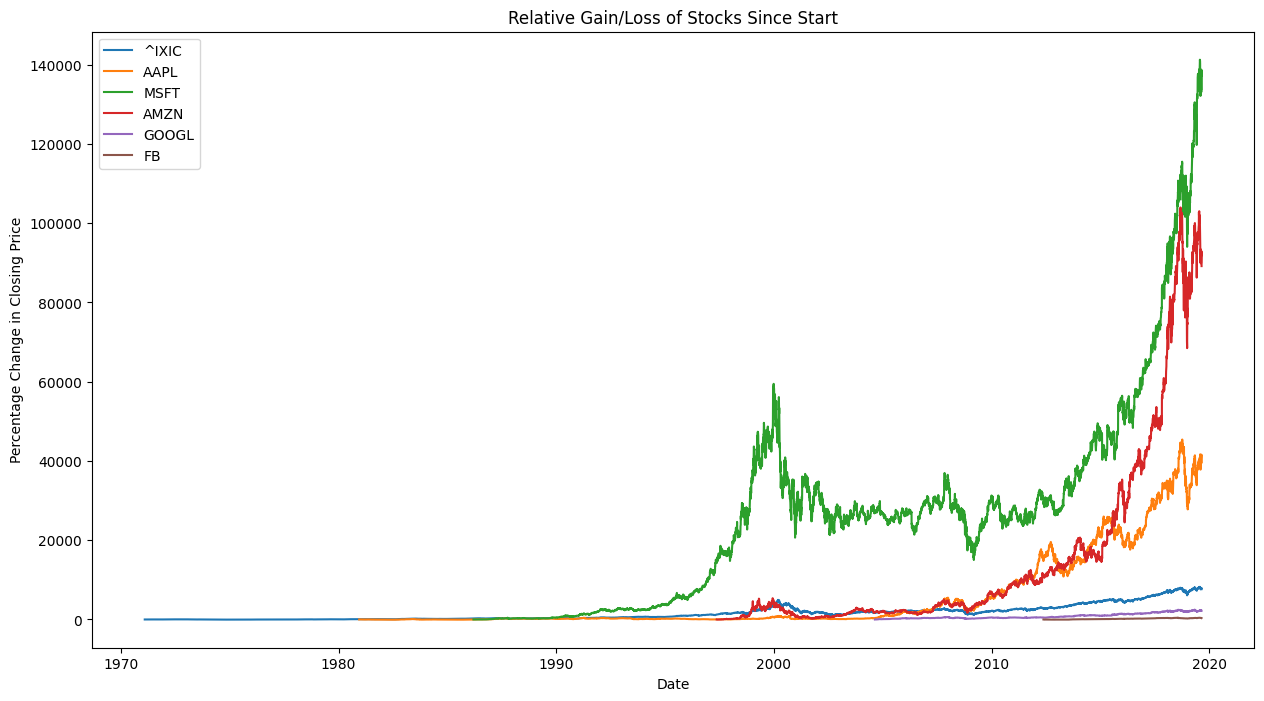

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/big_five_stocks.csv")

df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15, 8))

for stock in df['name'].unique():
    stock_data = df[df['name'] == stock]
    # Calculate the percentage change relative to the first closing price
    stock_data['percentage_change'] = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100
    plt.plot(stock_data['Date'], stock_data['percentage_change'], label=stock)

plt.title('Relative Gain/Loss of Stocks Since Start')
plt.xlabel('Date')
plt.ylabel('Percentage Change in Closing Price')
plt.legend()
plt.show()

<ipython-input-20-e62496892aef>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['percentage_change'] = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100
<ipython-input-20-e62496892aef>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['percentage_change'] = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100


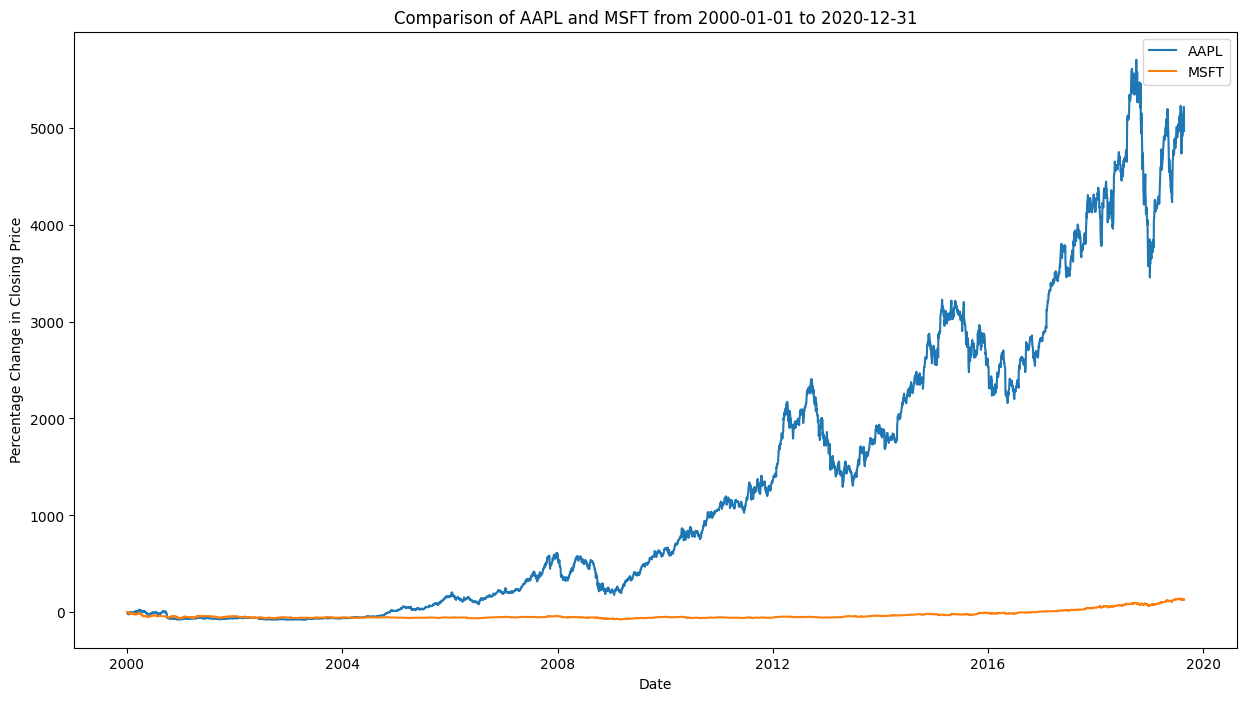

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def compare_tickers(data, ticker1, ticker2, start_date, end_date):
    # Convert dates to datetime
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filter the data for the two tickers and the specified date range
    data_filtered = data[(data['name'].isin([ticker1, ticker2])) & (data['Date'] >= start_date) & (data['Date'] <= end_date)]

    plt.figure(figsize=(15, 8))

    for stock in [ticker1, ticker2]:
        stock_data = data_filtered[data_filtered['name'] == stock]
        # Calculate the percentage change relative to the first closing price
        stock_data['percentage_change'] = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100
        plt.plot(stock_data['Date'], stock_data['percentage_change'], label=stock)

    plt.title(f'Comparison of {ticker1} and {ticker2} from {start_date.date()} to {end_date.date()}')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change in Closing Price')
    plt.legend()
    plt.show()

# Example usage
df = pd.read_csv("/content/big_five_stocks.csv")
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# You can call this function with the desired parameters
# For example, to compare 'AAPL' and 'MSFT' from 2000 to 2010:
compare_tickers(df, 'AAPL', 'MSFT', '2000-01-01', '2020-12-31')


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("/content/big_five_stocks.csv")
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Display available tickers and timeframes
print("Available tickers and their timeframes:")
for ticker in df['name'].unique():
    ticker_data = df[df['name'] == ticker]
    start_date = ticker_data['Date'].min().strftime('%Y')
    end_date = ticker_data['Date'].max().strftime('%Y')
    print(f"{ticker}: from {start_date} to {end_date}")

def plot_stock_performance(data, tickers, start_year, end_year, plot_type):
    start_date = pd.to_datetime(f'{start_year}-01-01')
    end_date = pd.to_datetime(f'{end_year}-12-31')

    plt.figure(figsize=(15, 8))

    for ticker in tickers:
        stock_data = data[(data['name'] == ticker) & (data['Date'] >= start_date) & (data['Date'] <= end_date)]

        if plot_type == 'log':
            plt.plot(stock_data['Date'], np.log(stock_data['close']), label=ticker)
        elif plot_type == 'relative':
            percentage_change = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100
            plt.plot(stock_data['Date'], percentage_change, label=ticker)

    plt.title('Stock Performance Comparison')
    plt.xlabel('Date')
    plt.ylabel('Log of Closing Price' if plot_type == 'log' else 'Percentage Change in Closing Price')
    plt.legend()
    plt.show()

# User input with error checking
num_stocks = int(input("How many stocks do you want to compare? "))
tickers = []
for i in range(num_stocks):
    while True:
        ticker = input(f"Enter ticker {i+1}: ")
        if ticker in tickers:
            print("This ticker has already been selected. Please choose a different one.")
        elif ticker not in df['name'].unique():
            print("This ticker is not available. Please choose a different one.")
        else:
            tickers.append(ticker)
            break

while True:
    start_year = int(input("Enter the start year (YYYY): "))
    if 1971 <= start_year <= 2018:
        break
    print("Start year must be between 1971 and 2018.")

while True:
    end_year = int(input("Enter the end year (YYYY): "))
    if start_year <= end_year <= 2020:
        break
    print("End year must be between the start year and 2020.")

plot_type = ""
while plot_type not in ['log', 'relative']:
    plot_type = input("Choose plot type ('log' or 'relative'): ")
    if plot_type not in ['log', 'relative']:
        print("Invalid plot type. Please enter 'log' or 'relative'.")

# Execute the function
plot_stock_performance(df, tickers, start_year, end_year, plot_type)


Available tickers and their timeframes:
^IXIC: from 1971 to 2019
AAPL: from 1980 to 2019
MSFT: from 1986 to 2019
AMZN: from 1997 to 2019
GOOGL: from 2004 to 2019
FB: from 2012 to 2019


KeyboardInterrupt: ignored

Available companies and their timeframes:
Apple: from 1980-12-12 to 2019-08-23
Microsoft: from 1986-03-13 to 2019-08-23
Amazon: from 1997-05-15 to 2019-08-23
Google: from 2004-08-19 to 2019-08-23
Facebook: from 2012-05-18 to 2019-08-23
NASDAQ Index: from 1971-02-05 to 2019-08-23
How many companies do you want to compare (1 to 6)? 2.3
Invalid input. Please enter a number between 1 and 6.
How many companies do you want to compare (1 to 6)? -1
Please enter a number between 1 and 6.
How many companies do you want to compare (1 to 6)? ahahah
Invalid input. Please enter a number between 1 and 6.
How many companies do you want to compare (1 to 6)? 2
Enter company name 1: Apple
Enter company name 2: Amazon
Enter the start year (YYYY): 2001
Enter the end year (YYYY): 1999
End year must be between the start year (2001) and 2020.
Enter the end year (YYYY): 2006
Choose plot type ('log' or 'relative'): log


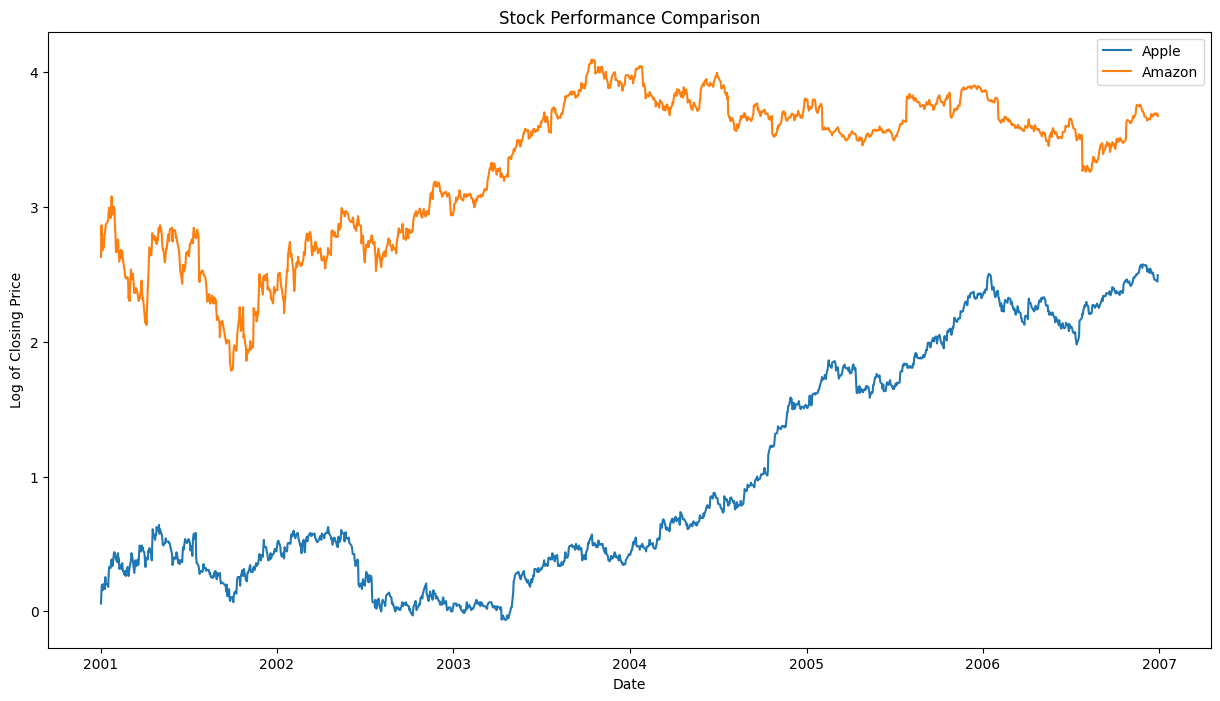

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("/content/big_five_stocks.csv")
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

# Mapping of full names to ticker symbols
name_to_ticker = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Google': 'GOOGL',
    'Facebook': 'FB',
    'NASDAQ Index': '^IXIC'
}

# Display available company names and their timeframes
print("Available companies and their timeframes:")
for name, ticker in name_to_ticker.items():
    ticker_data = df[df['name'] == ticker]
    start_date = ticker_data['Date'].min().strftime('%Y-%m-%d')
    end_date = ticker_data['Date'].max().strftime('%Y-%m-%d')
    print(f"{name}: from {start_date} to {end_date}")

# Function to plot stock performance
def plot_stock_performance(data, companies, start_year, end_year, plot_type):
    start_date = pd.to_datetime(f'{start_year}-01-01')
    end_date = pd.to_datetime(f'{end_year}-12-31')

    plt.figure(figsize=(15, 8))

    for company in companies:
        ticker = name_to_ticker[company]
        stock_data = data[(data['name'] == ticker) & (data['Date'] >= start_date) & (data['Date'] <= end_date)]

        if stock_data.empty:
            print(f"Warning: {company} was not public for the entire selected time frame.")
            continue

        if plot_type == 'log':
            plt.plot(stock_data['Date'], np.log(stock_data['close']), label=company)
        elif plot_type == 'relative':
            percentage_change = ((stock_data['close'] - stock_data['close'].iloc[0]) / stock_data['close'].iloc[0]) * 100
            plt.plot(stock_data['Date'], percentage_change, label=company)

    plt.title('Stock Performance Comparison')
    plt.xlabel('Date')
    plt.ylabel('Log of Closing Price' if plot_type == 'log' else 'Percentage Change in Closing Price')
    plt.legend()
    plt.show()

# User input with error checking
num_companies = 0
while not 1 <= num_companies <= 6:
    try:
        num_companies = int(input("How many companies do you want to compare (1 to 6)? "))
        if not 1 <= num_companies <= 6:
            print("Please enter a number between 1 and 6.")
    except ValueError:
        print("Invalid input. Please enter a number between 1 and 6.")

companies = list(name_to_ticker.keys()) if num_companies == 6 else []
while len(companies) < num_companies:
    company = input(f"Enter company name {len(companies) + 1}: ")
    if company not in name_to_ticker:
        print("Invalid company name. Please choose from: Apple, Microsoft, Amazon, Google, Facebook, NASDAQ Index.")
    elif company in companies:
        print("This company has already been selected. Please choose a different one.")
    else:
        companies.append(company)

start_year = end_year = 0
while not 1971 <= start_year <= 2018:
    try:
        start_year = int(input("Enter the start year (YYYY): "))
        if not 1971 <= start_year <= 2018:
            print("Start year must be between 1971 and 2018.")
    except ValueError:
        print("Invalid input. Start year must be a number between 1971 and 2018.")

while not start_year <= end_year <= 2020:
    try:
        end_year = int(input("Enter the end year (YYYY): "))
        if not start_year <= end_year <= 2020:
            print(f"End year must be between the start year ({start_year}) and 2020.")
    except ValueError:
        print(f"Invalid input. End year must be a number between the start year ({start_year}) and 2020.")

plot_type = ""
while plot_type not in ['log', 'relative']:
    plot_type = input("Choose plot type ('log' or 'relative'): ")
    if plot_type not in ['log', 'relative']:
        print("Invalid plot type. Please enter 'log' or 'relative'.")

# Execute the function
plot_stock_performance(df, companies, start_year, end_year, plot_type)


# Neuer Abschnitt